In [1]:
import numpy as np
import pandas as pd
import datetime as dt # date and time processing functions
import matplotlib.pyplot as plt # basic plotting 
import matplotlib.dates as mdates # date processing in matplotlib
from matplotlib.offsetbox import AnchoredText
plt.style.use('ggplot') # use ggplot style


import seaborn as sns
import os



In [2]:
df = pd.DataFrame()

for db in os.listdir('./data/'):
    df = pd.concat([df, pd.read_csv('./data/' + db, sep='\t', parse_dates=True, index_col=['date'])])

df.head()

df['mean'] = (df['min'] + df['max']) / 2
df.index = pd.to_datetime(df.index, format="%d/%m/%Y")
df.head()

,min,max,mean
date,,,
2018-01-01,7.0,13.0,10.0
2018-01-02,-1.0,7.0,3.0
2018-01-03,-1.0,10.0,4.5
2018-01-04,5.0,13.0,9.0
2018-01-05,5.0,15.0,10.0


In [3]:
df.reset_index(inplace=True)

In [4]:
df = df.sort_values('date')

In [5]:
df.head()

,date,min,max,mean
365,1998-01-01,6.0,13.0,9.5
366,1998-01-02,5.0,9.0,7.0
367,1998-01-03,5.0,14.0,9.5
368,1998-01-04,7.0,12.0,9.5
369,1998-01-05,5.0,14.0,9.5


In [8]:
df.groupby(df['date'].dt.year).mean()

,date,min,max,mean
date,,,,
1998,1998-07-02 00:00:00.000000000,8.460274,18.675141,13.581921
1999,1999-07-02 00:00:00.000000000,10.438040,18.945619,14.719697
2000,2000-07-01 12:00:00.000000000,11.845938,20.028818,15.959654
2010,2010-07-02 00:00:00.000000000,10.337243,18.256716,14.302985
2015,2015-07-02 00:00:00.000000000,10.186944,19.525680,14.850453
2017,2017-07-02 00:00:00.000000000,9.653521,19.727011,14.665230
2018,2018-07-02 00:00:00.000000000,9.968481,19.402941,14.647059
2022,2022-07-01 23:59:59.999999744,10.081232,19.340974,14.760057


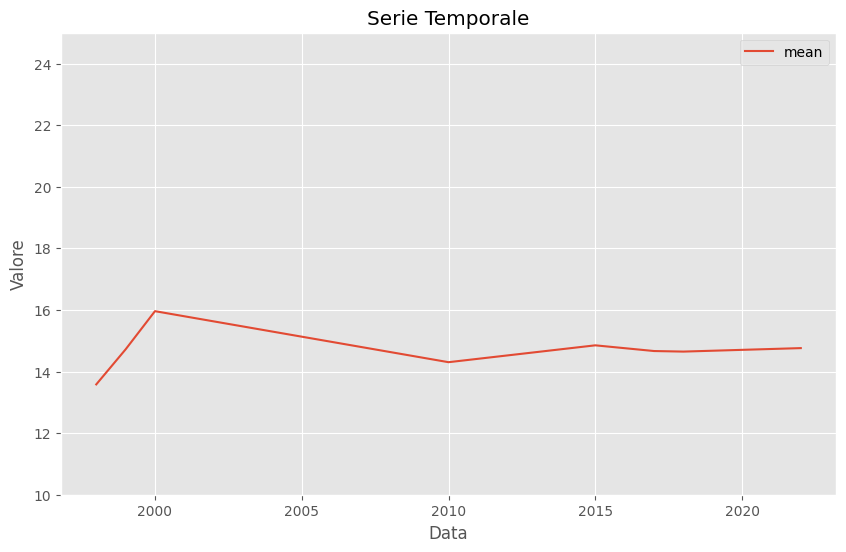

In [6]:
df.groupby(df['date'].dt.year).mean()['mean'].plot(figsize=(10, 6))
plt.title('Serie Temporale')
plt.xlabel('Data')
plt.ylabel('Valore')

plt.ylim(10, 25)

plt.legend()
plt.show()